In [1]:
# importing library  
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  

import pylab as pltPlot

In [2]:
# variable to collect all data
total_data = []

In [3]:
# function for label converter
def labelConverter(Value):
    returnString = ''
    if Value == 0:
        returnString = 'setosa'
    elif Value == 1:
        returnString = 'versicolor'
    else:
        returnString = 'virginica'
    return returnString

In [4]:
""" Linear Regression Class """
class linear_regression:

    # default run 
    def __init__(self):
        self.X = 0
        self.Y = 0
        self.weights=np.random.rand(1)
        self.bias=0.
        self.lambda_=0.02

    # fit function
    def fit(self,X,Y,kind):
        self.Min_Loss_Value = 0
        self.Min_Weight_Value = 0
        self.Min_Bias_Value = 0   
        self.all_weights = []
        self.all_bias = []
        self.all_losses = []
        alpha = 0.1

        # logic for Normal BGD 
        if kind == 'Non-Reg':
            max_iter=100
            x = pd.Series(X)
            y = pd.Series(Y)
            converger_value = False
            iter = 0
            m = x.shape[0] 
            t0, t1 = 0, 0
            while not converger_value:
                temp_v_one = [(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]
                grade_one = 1.0/m * sum(temp_v_one) 
                temp_v_two = [(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)]
                grade_two = 1.0/m * sum(temp_v_two)
                temp_one = t0 - alpha * grade_one
                temp_two = t1 - alpha * grade_two
                t0 = temp_one
                t1 = temp_two
                temp_v_three = [(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)]
                temp_val = sum(temp_v_three)
                final_value = 1/2/m * temp_val
                self.all_losses.append(final_value)
                iter += 1  
                if iter == max_iter:
                    converger_value = True
            self.Min_Loss_Value = self.all_losses[-1]
            self.theta0 = t0
            self.theta1 = t1
            self.Min_Weight_Value = float(str(self.theta0[0]))
            self.Min_Bias_Value = float(self.theta1[0])
            print ("Weight ->",self.Min_Weight_Value)
            print("Bias ->",self.Min_Bias_Value)
            print("Loss ->",self.Min_Loss_Value[0])
            for i in range(X.shape[0]):
                y_predict = self.theta0 + self.theta1*X 
            pltPlot.title("Non-Regularized Graph Original V/s Predicted")
            pltPlot.plot(X,Y,'o')
            pltPlot.plot(X,y_predict,'k-')
            pltPlot.show()
        
        # logic for regularized
        else:
            self.X = X
            self.Y = Y
            learning_rate=0.01
            no_of_iterations=100
            x = np.array([ [z] for z in X])    
            y = Y
            n = x.shape[0]
            for epoch in range(no_of_iterations):
                temp_y=np.dot(x,self.weights)+self.bias
                temp_y = 1/(1+np.exp(-temp_y))
                diff=y-temp_y
                temp_weight_value=+np.dot(x.T,diff)*learning_rate/n
                temp_weight_value=temp_weight_value+self.lambda_*self.weights*2
                self.weights-=temp_weight_value
                temp_bias_value=+np.sum(diff)*learning_rate/n
                self.bias-=temp_bias_value
                temp_value_one=np.sum(np.multiply(y,np.log(1-temp_y)))
                temp_value_two=np.sum(np.multiply(1-y,np.log(temp_y)))
                reg=sum((self.weights**2))*self.lambda_
                temp_loss = -(temp_value_one+temp_value_two)/len(y)-reg
                self.all_losses.append(temp_loss)
                self.all_weights.append(self.weights)
                self.all_bias.append(self.bias)    
            self.Min_Loss_Value  = min(self.all_losses)
            location = self.all_losses.index(self.Min_Loss_Value)
            self.Min_Weight_Value = self.all_weights[location][0]
            self.Min_Bias_Value = self.all_bias[location]
            print("Bias ->",self.Min_Weight_Value)
            print("Weight ->",self.Min_Bias_Value)
            print("Loss ->",self.Min_Loss_Value)
            for i in range(self.X.shape[0]):
                y_predict = int(self.all_weights[location]) + self.all_bias[location]*self.X 
            pltPlot.title("Regularized Graph Original V/s Predicted")
            pltPlot.plot(self.X,self.Y,'o')
            pltPlot.plot(self.X,y_predict,'k-')
            pltPlot.show() 
        
        # final plotting for loss vs iteration
        pltPlot.title(kind+" - Loss V/s Number of Iterations")
        pltPlot.plot(self.all_losses)
        pltPlot.ylabel("Loss Value")
        pltPlot.xlabel("No of Iteration")
        pltPlot.show()
    
    # prediction function
    def prediction(self,weight,bias, F_Train, F_Test, L_Train):
        y_pred = []
        for i in range(F_Test.shape[0]):
            y_pred.append(weight*F_Test[i] + bias)
        return y_pred

In [5]:
""" Loading Dataset """

# loading iris dataset
df_iris= datasets.load_iris()

# getting column names
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# converting all label digits to label names
all_labels_names = np.array([labelConverter(x) for x in df_iris.target ])

# apllying standard scaling
standard_scalar = StandardScaler()
all_features_standard_scaled = standard_scalar.fit_transform(df_iris.data)

# concatinatign complete data
df_iris_all = pd.concat([pd.DataFrame(all_features_standard_scaled), pd.DataFrame(all_labels_names)], axis=1, join='inner')
df_iris_all.columns = column_names

# filtering setosa data
df_iris_setosa = df_iris_all.loc[df_iris_all["species"] == "setosa"]
df_iris_setosa = df_iris_setosa.reset_index()

# filtering virginica data
df_iris_virginica = df_iris_all.loc[df_iris_all["species"] == "virginica"]
df_iris_virginica = df_iris_virginica.reset_index()

# filtering versicolor data
df_iris_versicolor = df_iris_all.loc[df_iris_all["species"] == "versicolor"]
df_iris_versicolor = df_iris_versicolor.reset_index()

In [6]:
""" Segment One """
print('setosa-sepal-length V/s setosa-sepal-width')

setosa-sepal-length V/s setosa-sepal-width


In [7]:
# loading dataset
X,Y = df_iris_setosa['sepal-length'],df_iris_setosa['sepal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> 1.460208552503944
Bias -> 0.725302160494853
Loss -> 0.2448954721165412


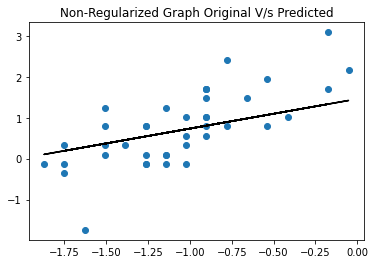

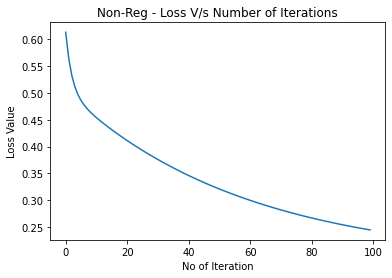

In [8]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['setosa-sepal-length','setosa-sepal-width','Non-Reg',temp_error])

Bias -> 0.04324457590761903
Weight -> -0.3823536186427874
Loss -> 0.6149825408447468


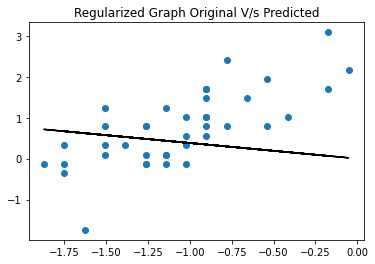

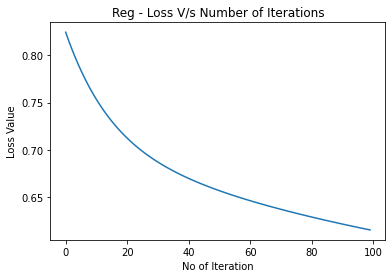

In [9]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['setosa-sepal-length','setosa-sepal-width','Reg',temp_error])

In [10]:
""" Segment two """
print('virginica-sepal-length V/s virginica-sepal-width')

virginica-sepal-length V/s virginica-sepal-width


In [11]:
# loading dataset
X,Y = df_iris_virginica['sepal-length'],df_iris_virginica['sepal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> -0.5940998613363759
Bias -> 0.4429206836570062
Loss -> 0.2532122187685182


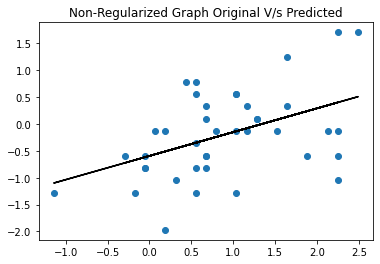

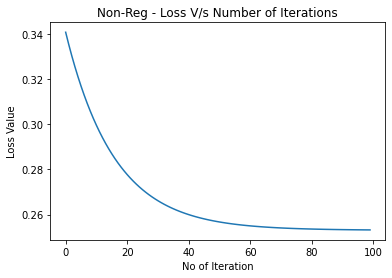

In [12]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['virginica-sepal-length','virginica-sepal-width','Non-Reg',temp_error])

Bias -> 0.12405408359358891
Weight -> 0.8295452123911449
Loss -> 0.1791402433116549


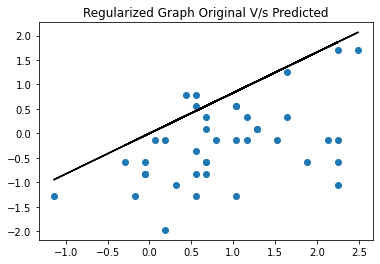

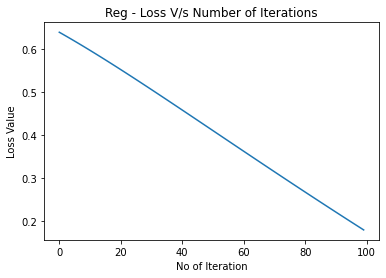

In [13]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['virginica-sepal-length','virginica-sepal-width','Reg',temp_error])

In [14]:
""" Segment three """
print('versicolor-sepal-length V/s versicolor-sepal-width')

versicolor-sepal-length V/s versicolor-sepal-width


In [15]:
# loading dataset
X,Y = df_iris_versicolor['sepal-length'],df_iris_versicolor['sepal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> -0.701608727122942
Bias -> 0.5647130088717545
Loss -> 0.18910656270663728


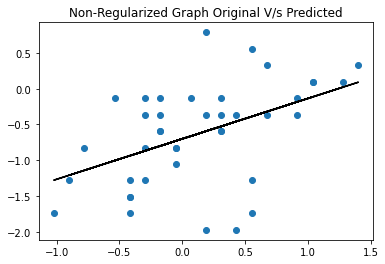

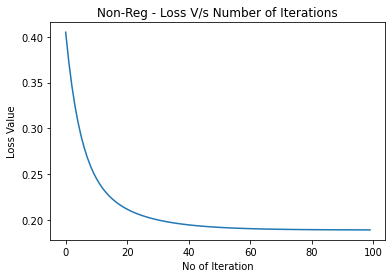

In [16]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['versicolor-sepal-length','versicolor-sepal-width','Non-Reg',temp_error])

Bias -> 0.006399582203411635
Weight -> 1.2741782137029707
Loss -> -0.539732424221056


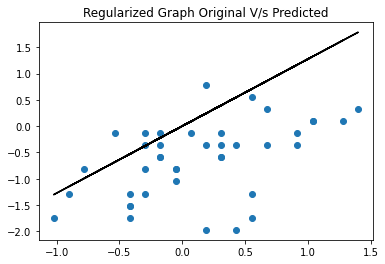

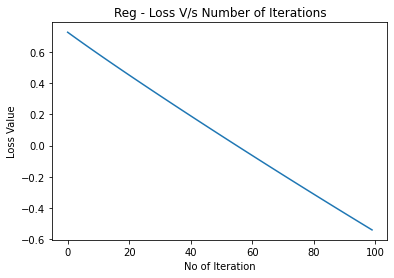

In [17]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['versicolor-sepal-length','versicolor-sepal-width','Reg',temp_error])

In [18]:
""" Segment Four """
print('setosa-petal-length V/s setosa-petal-width')

setosa-petal-length V/s setosa-petal-width


In [19]:
# loading dataset
X,Y = df_iris_setosa['petal-length'],df_iris_setosa['petal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> -0.4640637670601466
Bias -> 0.6057015945462516
Loss -> 0.008627846654402629


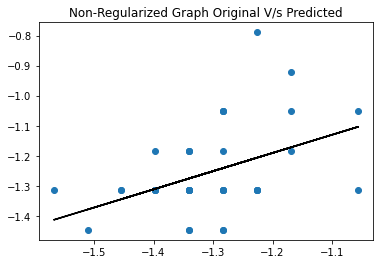

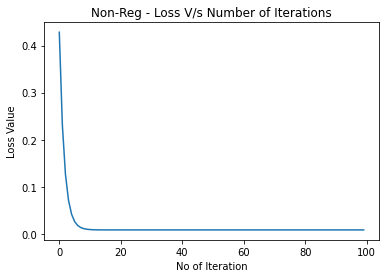

In [20]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['setosa-petal-length','setosa-petal-width','Non-Reg',temp_error])

Bias -> -0.6901325879334717
Weight -> 2.043554560203564
Loss -> -3.631990606171555


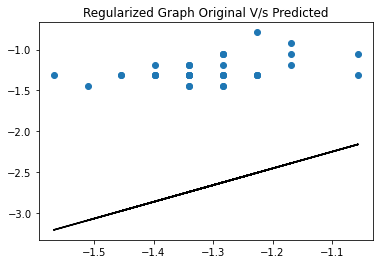

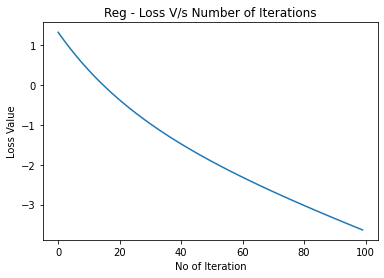

In [21]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['setosa-petal-length','setosa-petal-width','Reg',temp_error])

In [22]:
""" Segment Five """
print('virginica-petal-length V/s virginica-petal-width')

virginica-petal-length V/s virginica-petal-width


In [23]:
# loading the dataset
X,Y = df_iris_virginica['petal-length'],df_iris_virginica['petal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> 0.6137828064603261
Bias -> 0.486398598995564
Loss -> 0.0541665202283431


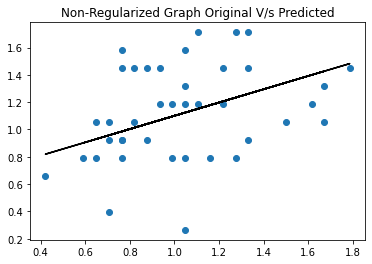

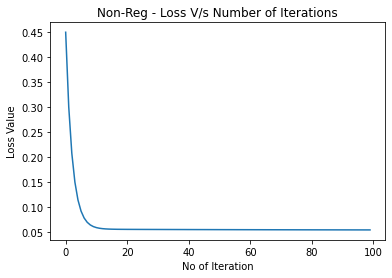

In [24]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['virginica-petal-length','virginica-petal-width','Non-Reg',temp_error])

Bias -> -0.20291376281242918
Weight -> -0.7121286589357858
Loss -> 0.21754649851528463


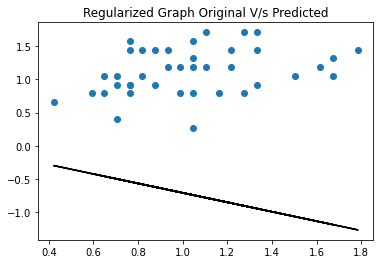

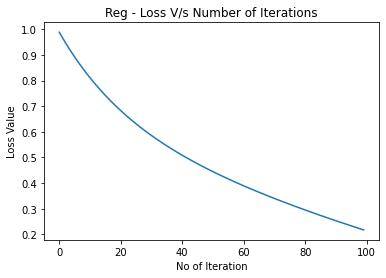

In [25]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['virginica-petal-length','virginica-petal-width','Reg',temp_error])

In [26]:
""" Segment Six """
print('versicolor-petal-length V/s versicolor-petal-width')

versicolor-petal-length V/s versicolor-petal-width


In [27]:
# Loading the dataset
X,Y = df_iris_versicolor['petal-length'],df_iris_versicolor['petal-width']
F_Train, F_Test, L_Train, L_Test = train_test_split(X,Y , random_state=104, test_size=0.20,shuffle=True)
F_Train = F_Train.reset_index(drop=True)
F_Test = F_Test.reset_index(drop=True)
L_Train = L_Train.reset_index(drop=True)
L_Test = L_Test.reset_index(drop=True)

Weight -> 0.08052738984954136
Bias -> 0.28255257079639273
Loss -> 0.015446095288501672


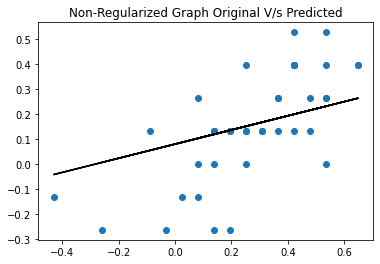

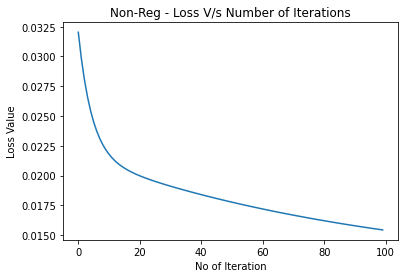

In [28]:
# RMS
Regression_Model_One = linear_regression()
Regression_Model_One.fit(F_Train,L_Train,'Non-Reg')
y_pred = Regression_Model_One.prediction(Regression_Model_One.Min_Bias_Value,Regression_Model_One.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['versicolor-petal-length','versicolor-petal-width','Non-Reg',temp_error])

Bias -> 0.031345467061426324
Weight -> 0.4084679687544293
Loss -> 0.5718937701924474


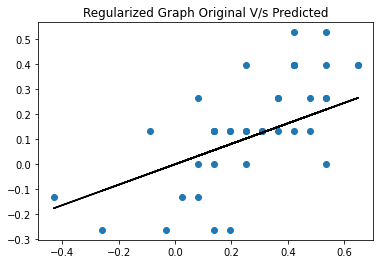

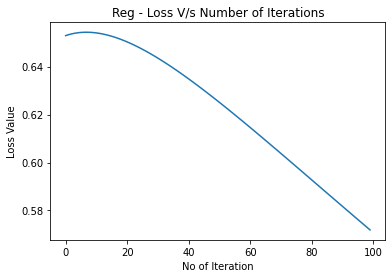

In [29]:
# L2
Regression_Model_Two=linear_regression()
Regression_Model_Two.fit(F_Train,L_Train,'Reg')
y_pred = Regression_Model_Two.prediction(Regression_Model_Two.Min_Bias_Value,Regression_Model_Two.Min_Weight_Value, F_Train, F_Test, L_Train)
temp_error = mean_squared_error(L_Test,y_pred)
total_data.append(['versicolor-petal-length','versicolor-petal-width','Reg',temp_error])

In [30]:
""" Final data """

' Final data '

In [31]:
last_data = pd.DataFrame(total_data, columns = ['Input','Output','Type of Model','Error'])
print(last_data)

                      Input                  Output Type of Model     Error
0       setosa-sepal-length      setosa-sepal-width       Non-Reg  0.358083
1       setosa-sepal-length      setosa-sepal-width           Reg  1.233995
2    virginica-sepal-length   virginica-sepal-width       Non-Reg  0.110297
3    virginica-sepal-length   virginica-sepal-width           Reg  1.263708
4   versicolor-sepal-length  versicolor-sepal-width       Non-Reg  0.342970
5   versicolor-sepal-length  versicolor-sepal-width           Reg  1.258352
6       setosa-petal-length      setosa-petal-width       Non-Reg  0.015832
7       setosa-petal-length      setosa-petal-width           Reg  4.394589
8    virginica-petal-length   virginica-petal-width       Non-Reg  0.149385
9    virginica-petal-length   virginica-petal-width           Reg  3.591110
10  versicolor-petal-length  versicolor-petal-width       Non-Reg  0.085070
11  versicolor-petal-length  versicolor-petal-width           Reg  0.065917
